<a href="https://colab.research.google.com/github/kdemertzis/TS_demer/blob/main/Fed_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install onnxruntime


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 KB 11.5 MB/s eta 0:00:00


In [10]:
# Import the necessary libraries
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Input
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Input

# Generate synthetic data
X, y = make_classification(n_samples=100000, n_features=41, n_informative=14, n_redundant=0, n_classes=2, random_state=42)
data = np.hstack((X, y.reshape(-1, 1)))

# Define the labels variable
labels = data[:, -1]
data = data[:, :-1]

# Define the client and server functions
def create_client_model():
    # Create a neural network model for each client
    input_layer = Input(shape=(X_train.shape[1],))
    hidden_layer1 = Dense(32, activation='relu')(input_layer)
    hidden_layer2 = Dense(16, activation='relu')(hidden_layer1)
    output_layer = Dense(1, activation='sigmoid')(hidden_layer2)
    model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_server_model():
    # Create a global neural network model for the server
    input_layer = Input(shape=(X_train.shape[1],))
    hidden_layer1 = Dense(32, activation='relu')(input_layer)
    hidden_layer2 = Dense(16, activation='relu')(hidden_layer1)
    output_layer = Dense(1, activation='sigmoid')(hidden_layer2)
    model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Split the KDD99 dataset into client datasets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
num_clients = 10
client_data = np.array_split(X_train, num_clients)
client_labels = np.array_split(y_train, num_clients)

# Create a server model
server_model = create_server_model()

# Train the model using federated learning
num_rounds = 10
num_epochs = 5
for round in range(num_rounds):
    print("Round: ", round+1)
    # Send the current global model to all clients
    client_models = []
    for i in range(num_clients):
        client_model = create_client_model()
        client_model.set_weights(server_model.get_weights())
        client_models.append(client_model)

    # Train each client model using their local data
    for i in range(num_clients):
        client_models[i].fit(client_data[i], client_labels[i], epochs=num_epochs, verbose=0)

    # Aggregate the model updates from all clients
    new_weights = np.array(server_model.get_weights())
    for i in range(num_clients):
        new_weights += np.array(client_models[i].get_weights())
    new_weights /= (num_clients + 1)
    server_model.set_weights(new_weights)

# Evaluate the final model on the test set
loss, acc = server_model.evaluate(X_test, y_test)
print("Test accuracy: ", acc)


Round:  1


<ipython-input-10-cdaaed199c0e>:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights = np.array(server_model.get_weights())
<ipython-input-10-cdaaed199c0e>:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights += np.array(client_models[i].get_weights())


Round:  2
Round:  3
Round:  4
Round:  5
Round:  6
Round:  7
Round:  8
Round:  9
Round:  10
625/625 [==============================] - 1s 2ms/step - loss: 0.0597 - accuracy: 0.9870
Test accuracy:  0.9870499968528748


Round:  1


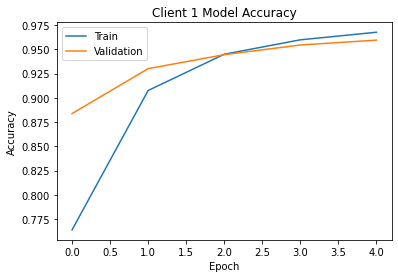

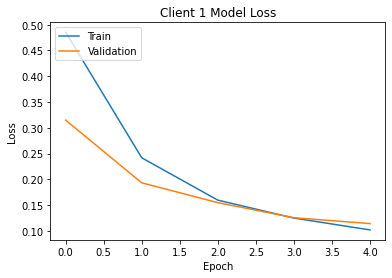

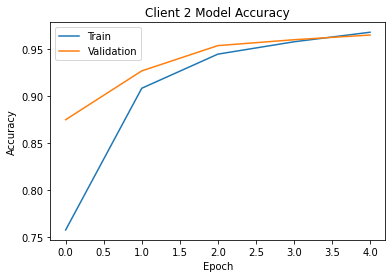

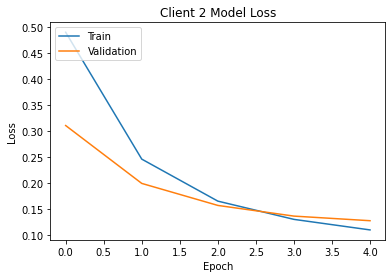

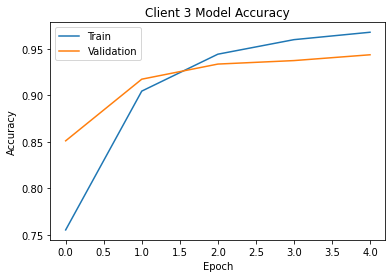

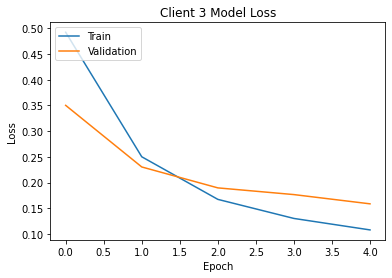

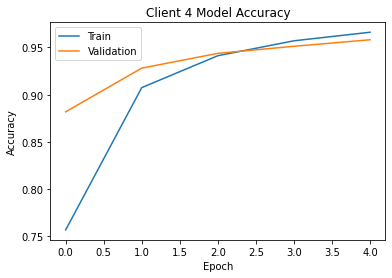

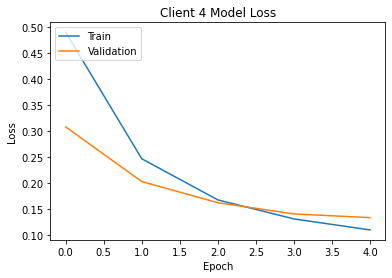

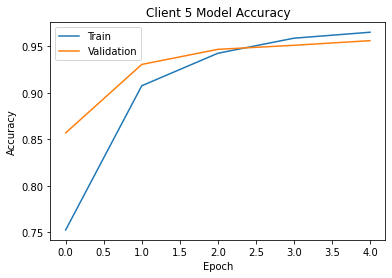

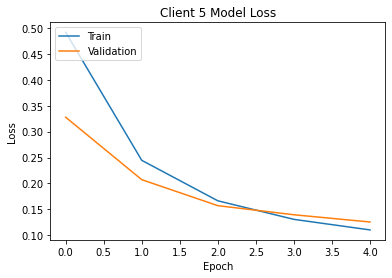

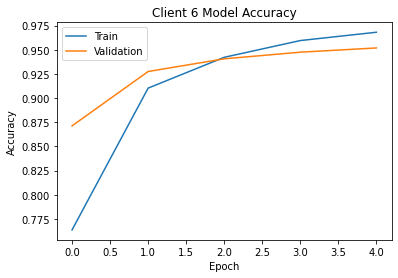

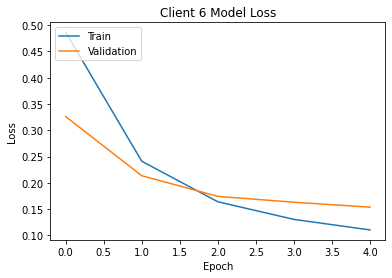

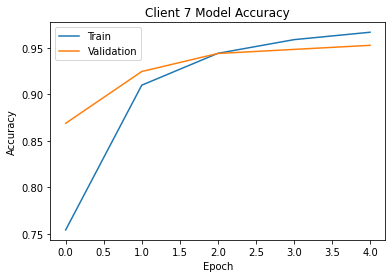

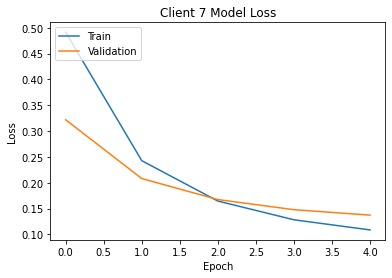

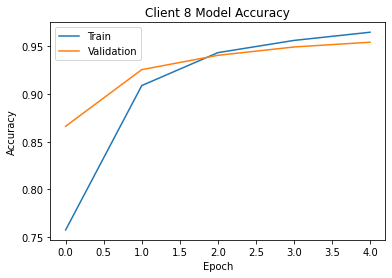

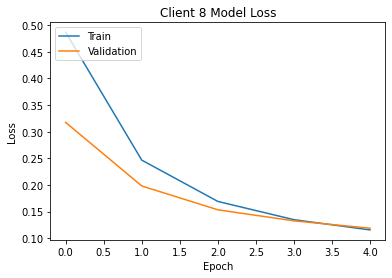

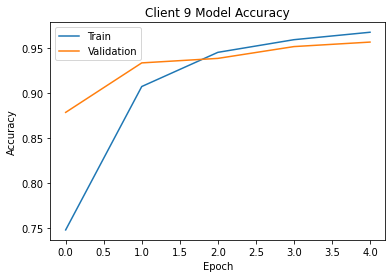

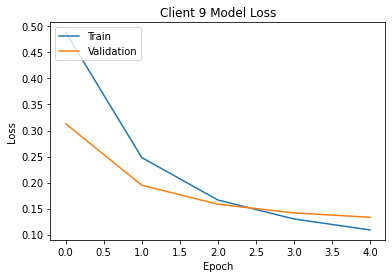

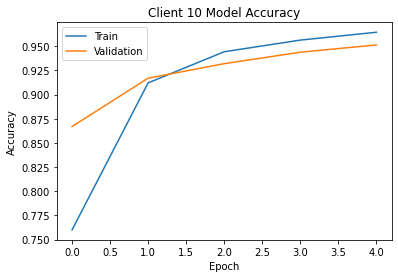

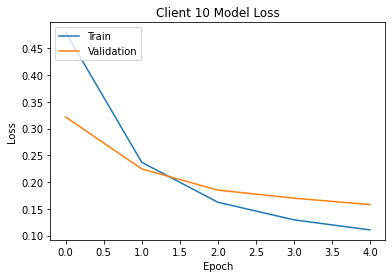

<ipython-input-6-6c36603e3dd3>:81: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights = np.array(client_models[0].get_weights())
<ipython-input-6-6c36603e3dd3>:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights += np.array(client_models[i].get_weights())


Global Model Accuracy:  0.963949978351593
Round:  2


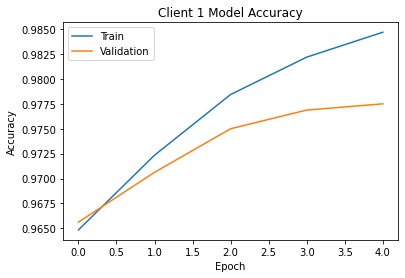

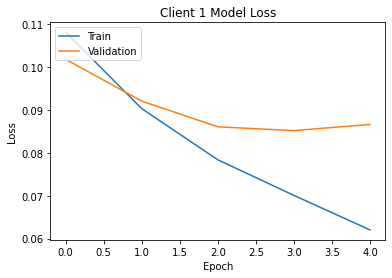

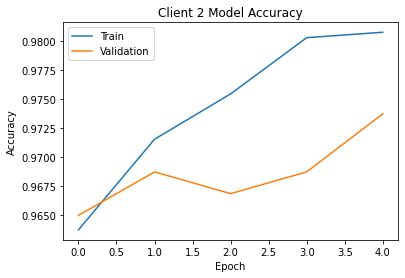

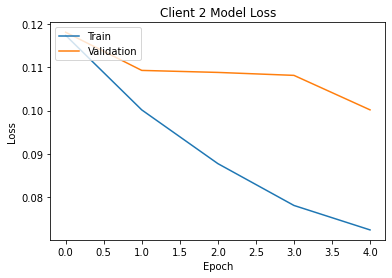

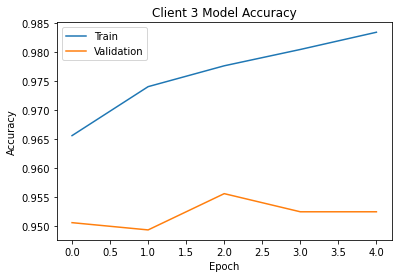

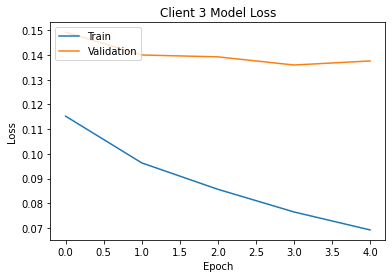

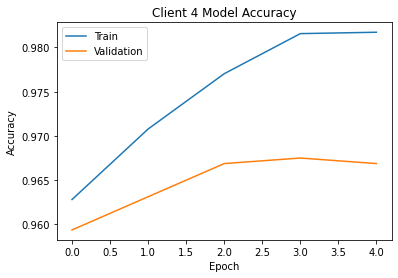

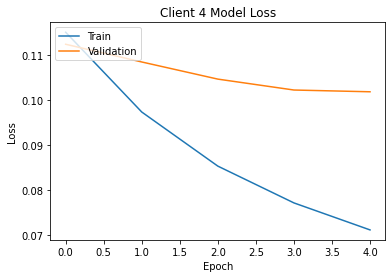

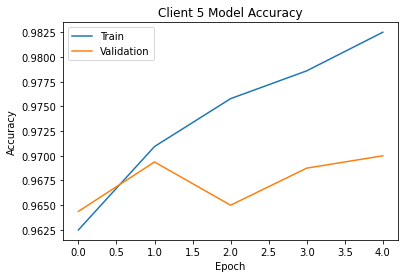

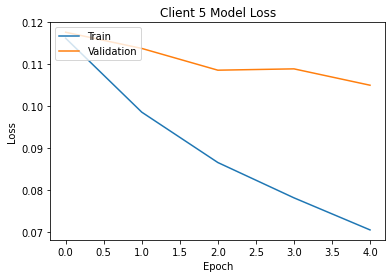

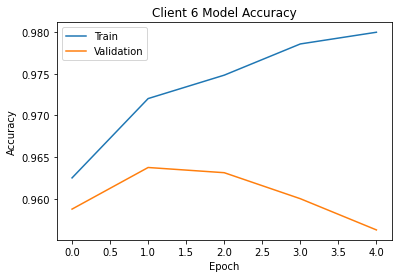

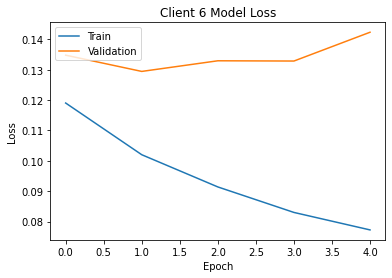

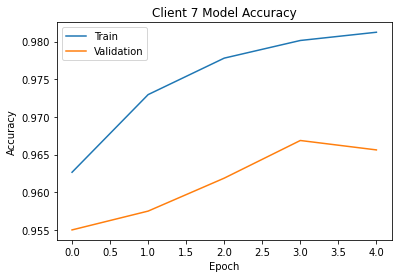

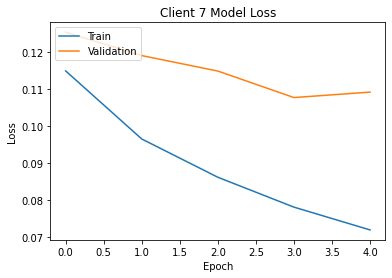

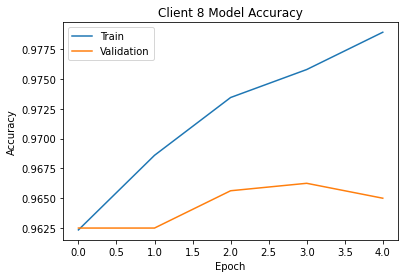

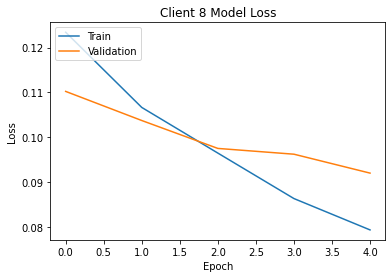

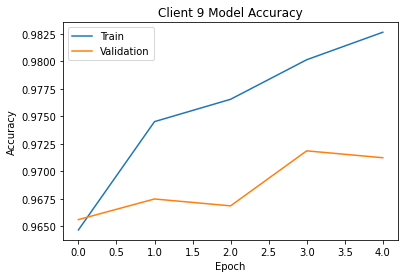

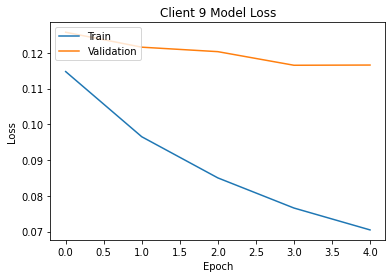

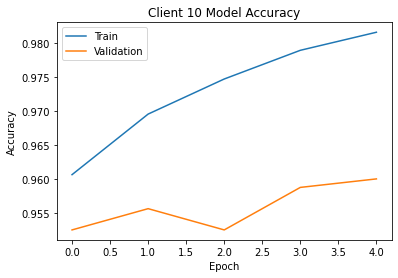

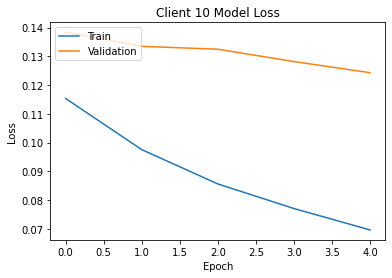

Global Model Accuracy:  0.9761999845504761
Round:  3


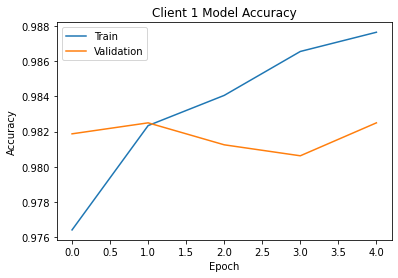

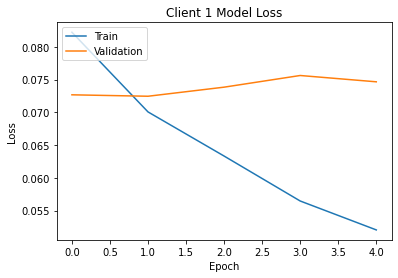

KeyboardInterrupt: ignored

In [6]:
# Import the necessary libraries
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_classification(n_samples=100000, n_features=41, n_informative=14, n_redundant=0, n_classes=2, random_state=42)
data = np.hstack((X, y.reshape(-1, 1)))

# Define the labels variable
labels = data[:, -1]
data = data[:, :-1]

# Define the client and server functions
def create_client_model():
    # Create a neural network model for each client
    input_layer = Input(shape=(X_train.shape[1],))
    hidden_layer1 = Dense(32, activation='relu')(input_layer)
    hidden_layer2 = Dense(16, activation='relu')(hidden_layer1)
    output_layer = Dense(1, activation='sigmoid')(hidden_layer2)
    model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_server_model():
    # Create a global neural network model for the server
    input_layer = Input(shape=(X_train.shape[1],))
    hidden_layer1 = Dense(32, activation='relu')(input_layer)
    hidden_layer2 = Dense(16, activation='relu')(hidden_layer1)
    output_layer = Dense(1, activation='sigmoid')(hidden_layer2)
    model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Split the synthetic data into client datasets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
num_clients = 10
client_data = np.array_split(X_train, num_clients)
client_labels = np.array_split(y_train, num_clients)

# Create a server model
server_model = create_server_model()

# Train the model using federated learning
num_rounds = 10
num_epochs = 5
global_history = []
for round in range(num_rounds):
    print("Round: ", round+1)
    # Send the current global model to all clients
    client_models = []
    for i in range(num_clients):
        client_model = create_client_model()
        client_model.set_weights(server_model.get_weights())
        client_models.append(client_model)

    # Train each client model using their local data
    local_histories = []
    for i in range(num_clients):
        history = client_models[i].fit(client_data[i], client_labels[i], epochs=num_epochs, verbose=0, validation_split=0.2)
        local_histories.append(history)
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title(f'Client {i+1} Model Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.show()
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title(f'Client {i+1} Model Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.show()

    # Aggregate the model updates from all clients
    new_weights = np.array(client_models[0].get_weights())
    for i in range(1, num_clients):
        new_weights += np.array(client_models[i].get_weights())
    new_weights /= num_clients
    server_model.set_weights(new_weights)

    # Evaluate the global model
    loss, acc = server_model.evaluate(X_test, y_test, verbose=0)
    global_history.append({'loss': loss, 'accuracy': acc})
    print("Global Model Accuracy: ", acc)

# Plot the performance of the global model
plt.plot([x['accuracy'] for x in global_history])
plt.plot([x['loss'] for x in global_history])
plt.title('Global Model Performance')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Round')
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.show()



In [9]:
# Import the necessary libraries
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Input
import pandas as pd

# Generate synthetic data
X, y = make_classification(n_samples=100000, n_features=41, n_informative=14, n_redundant=0, n_classes=2, random_state=42)
data = np.hstack((X, y.reshape(-1, 1)))

# Define the labels variable
labels = data[:, -1]
data = data[:, :-1]

# Define the client and server functions
def create_client_model():
    # Create a neural network model for each client
    input_layer = Input(shape=(X_train.shape[1],))
    hidden_layer1 = Dense(32, activation='relu')(input_layer)
    hidden_layer2 = Dense(16, activation='relu')(hidden_layer1)
    output_layer = Dense(1, activation='sigmoid')(hidden_layer2)
    model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_server_model():
    # Create a global neural network model for the server
    input_layer = Input(shape=(X_train.shape[1],))
    hidden_layer1 = Dense(32, activation='relu')(input_layer)
    hidden_layer2 = Dense(16, activation='relu')(hidden_layer1)
    output_layer = Dense(1, activation='sigmoid')(hidden_layer2)
    model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Split the synthetic data into client datasets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
num_clients = 10
client_data = np.array_split(X_train, num_clients)
client_labels = np.array_split(y_train, num_clients)

# Create a server model
server_model = create_server_model()

# Train the model using federated learning
num_rounds = 10
num_epochs = 5
global_history = []
client_history = []
for round in range(num_rounds):
    print("Round: ", round+1)
    # Send the current global model to all clients
    client_models = []
    for i in range(num_clients):
        client_model = create_client_model()
        client_model.set_weights(server_model.get_weights())
        client_models.append(client_model)

    # Train each client model using their local data
    local_histories = []
    for i in range(num_clients):
        history = client_models[i].fit(client_data[i], client_labels[i], epochs=num_epochs, verbose=0, validation_split=0.2)
        local_histories.append(history)
        loss, acc = client_models[i].evaluate(X_test, y_test, verbose=0)
        client_history.append({'round': round+1, 'client': i+1, 'loss': loss, 'accuracy': acc})

    # Aggregate the model updates from all clients
    new_weights = np.array(client_models[0].get_weights())
    for i in range(1, num_clients):
        new_weights += np.array(client_models[i].get_weights())
    new_weights /= num_clients
    server_model.set_weights(new_weights)

    # Evaluate the global model
    loss, acc = server_model.evaluate(X_test, y_test, verbose=0)
    global_history.append({'round': round+1, 'loss': loss, 'accuracy': acc})
    print("Global Model Accuracy: ", acc)

    # Create a table of performance metrics for each client model and the final global model
    client_history_df = pd.DataFrame(client_history)
    global_history_df = pd.DataFrame(global_history)
    print("Client Model Performance Metrics:")
    print(client_history_df)
    print("Global Model Performance Metrics:")
    print(global_history_df)

   


Round:  1


<ipython-input-9-e33e3cb1ee11>:70: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights = np.array(client_models[0].get_weights())
<ipython-input-9-e33e3cb1ee11>:72: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights += np.array(client_models[i].get_weights())


Global Model Accuracy:  0.9608500003814697
Client Model Performance Metrics:
   round  client      loss  accuracy
0      1       1  0.130675   0.95425
1      1       2  0.119807   0.95980
2      1       3  0.124626   0.95795
3      1       4  0.124670   0.95770
4      1       5  0.129746   0.95695
5      1       6  0.125701   0.95815
6      1       7  0.124332   0.95840
7      1       8  0.124286   0.95865
8      1       9  0.125443   0.95840
9      1      10  0.124528   0.95915
Global Model Performance Metrics:
   round      loss  accuracy
0      1  0.117757   0.96085
Round:  2


<ipython-input-9-e33e3cb1ee11>:70: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights = np.array(client_models[0].get_weights())
<ipython-input-9-e33e3cb1ee11>:72: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights += np.array(client_models[i].get_weights())


Global Model Accuracy:  0.9725499749183655
Client Model Performance Metrics:
    round  client      loss  accuracy
0       1       1  0.130675   0.95425
1       1       2  0.119807   0.95980
2       1       3  0.124626   0.95795
3       1       4  0.124670   0.95770
4       1       5  0.129746   0.95695
5       1       6  0.125701   0.95815
6       1       7  0.124332   0.95840
7       1       8  0.124286   0.95865
8       1       9  0.125443   0.95840
9       1      10  0.124528   0.95915
10      2       1  0.103802   0.96725
11      2       2  0.095699   0.97120
12      2       3  0.098659   0.96900
13      2       4  0.101554   0.96830
14      2       5  0.099728   0.96970
15      2       6  0.100356   0.97000
16      2       7  0.099165   0.96945
17      2       8  0.097211   0.97075
18      2       9  0.098539   0.96860
19      2      10  0.103287   0.96815
Global Model Performance Metrics:
   round      loss  accuracy
0      1  0.117757   0.96085
1      2  0.090462   0.97255
Roun

<ipython-input-9-e33e3cb1ee11>:70: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights = np.array(client_models[0].get_weights())
<ipython-input-9-e33e3cb1ee11>:72: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights += np.array(client_models[i].get_weights())


Global Model Accuracy:  0.9781000018119812
Client Model Performance Metrics:
    round  client      loss  accuracy
0       1       1  0.130675   0.95425
1       1       2  0.119807   0.95980
2       1       3  0.124626   0.95795
3       1       4  0.124670   0.95770
4       1       5  0.129746   0.95695
5       1       6  0.125701   0.95815
6       1       7  0.124332   0.95840
7       1       8  0.124286   0.95865
8       1       9  0.125443   0.95840
9       1      10  0.124528   0.95915
10      2       1  0.103802   0.96725
11      2       2  0.095699   0.97120
12      2       3  0.098659   0.96900
13      2       4  0.101554   0.96830
14      2       5  0.099728   0.96970
15      2       6  0.100356   0.97000
16      2       7  0.099165   0.96945
17      2       8  0.097211   0.97075
18      2       9  0.098539   0.96860
19      2      10  0.103287   0.96815
20      3       1  0.096016   0.97230
21      3       2  0.088658   0.97485
22      3       3  0.088139   0.97445
23      3  

<ipython-input-9-e33e3cb1ee11>:70: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights = np.array(client_models[0].get_weights())
<ipython-input-9-e33e3cb1ee11>:72: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights += np.array(client_models[i].get_weights())


Global Model Accuracy:  0.9800999760627747
Client Model Performance Metrics:
    round  client      loss  accuracy
0       1       1  0.130675   0.95425
1       1       2  0.119807   0.95980
2       1       3  0.124626   0.95795
3       1       4  0.124670   0.95770
4       1       5  0.129746   0.95695
5       1       6  0.125701   0.95815
6       1       7  0.124332   0.95840
7       1       8  0.124286   0.95865
8       1       9  0.125443   0.95840
9       1      10  0.124528   0.95915
10      2       1  0.103802   0.96725
11      2       2  0.095699   0.97120
12      2       3  0.098659   0.96900
13      2       4  0.101554   0.96830
14      2       5  0.099728   0.96970
15      2       6  0.100356   0.97000
16      2       7  0.099165   0.96945
17      2       8  0.097211   0.97075
18      2       9  0.098539   0.96860
19      2      10  0.103287   0.96815
20      3       1  0.096016   0.97230
21      3       2  0.088658   0.97485
22      3       3  0.088139   0.97445
23      3  

<ipython-input-9-e33e3cb1ee11>:70: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights = np.array(client_models[0].get_weights())
<ipython-input-9-e33e3cb1ee11>:72: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights += np.array(client_models[i].get_weights())


Global Model Accuracy:  0.9815499782562256
Client Model Performance Metrics:
    round  client      loss  accuracy
0       1       1  0.130675   0.95425
1       1       2  0.119807   0.95980
2       1       3  0.124626   0.95795
3       1       4  0.124670   0.95770
4       1       5  0.129746   0.95695
5       1       6  0.125701   0.95815
6       1       7  0.124332   0.95840
7       1       8  0.124286   0.95865
8       1       9  0.125443   0.95840
9       1      10  0.124528   0.95915
10      2       1  0.103802   0.96725
11      2       2  0.095699   0.97120
12      2       3  0.098659   0.96900
13      2       4  0.101554   0.96830
14      2       5  0.099728   0.96970
15      2       6  0.100356   0.97000
16      2       7  0.099165   0.96945
17      2       8  0.097211   0.97075
18      2       9  0.098539   0.96860
19      2      10  0.103287   0.96815
20      3       1  0.096016   0.97230
21      3       2  0.088658   0.97485
22      3       3  0.088139   0.97445
23      3  

<ipython-input-9-e33e3cb1ee11>:70: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights = np.array(client_models[0].get_weights())
<ipython-input-9-e33e3cb1ee11>:72: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights += np.array(client_models[i].get_weights())


Global Model Accuracy:  0.9829999804496765
Client Model Performance Metrics:
    round  client      loss  accuracy
0       1       1  0.130675   0.95425
1       1       2  0.119807   0.95980
2       1       3  0.124626   0.95795
3       1       4  0.124670   0.95770
4       1       5  0.129746   0.95695
5       1       6  0.125701   0.95815
6       1       7  0.124332   0.95840
7       1       8  0.124286   0.95865
8       1       9  0.125443   0.95840
9       1      10  0.124528   0.95915
10      2       1  0.103802   0.96725
11      2       2  0.095699   0.97120
12      2       3  0.098659   0.96900
13      2       4  0.101554   0.96830
14      2       5  0.099728   0.96970
15      2       6  0.100356   0.97000
16      2       7  0.099165   0.96945
17      2       8  0.097211   0.97075
18      2       9  0.098539   0.96860
19      2      10  0.103287   0.96815
20      3       1  0.096016   0.97230
21      3       2  0.088658   0.97485
22      3       3  0.088139   0.97445
23      3  

<ipython-input-9-e33e3cb1ee11>:70: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights = np.array(client_models[0].get_weights())
<ipython-input-9-e33e3cb1ee11>:72: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights += np.array(client_models[i].get_weights())


Global Model Accuracy:  0.9836999773979187
Client Model Performance Metrics:
    round  client      loss  accuracy
0       1       1  0.130675   0.95425
1       1       2  0.119807   0.95980
2       1       3  0.124626   0.95795
3       1       4  0.124670   0.95770
4       1       5  0.129746   0.95695
..    ...     ...       ...       ...
65      7       6  0.079021   0.97995
66      7       7  0.077620   0.98040
67      7       8  0.075646   0.98025
68      7       9  0.076669   0.97970
69      7      10  0.078047   0.98040

[70 rows x 4 columns]
Global Model Performance Metrics:
   round      loss  accuracy
0      1  0.117757   0.96085
1      2  0.090462   0.97255
2      3  0.080731   0.97810
3      4  0.075924   0.98010
4      5  0.073171   0.98155
5      6  0.070510   0.98300
6      7  0.068495   0.98370
Round:  8


<ipython-input-9-e33e3cb1ee11>:70: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights = np.array(client_models[0].get_weights())
<ipython-input-9-e33e3cb1ee11>:72: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights += np.array(client_models[i].get_weights())


Global Model Accuracy:  0.9844499826431274
Client Model Performance Metrics:
    round  client      loss  accuracy
0       1       1  0.130675   0.95425
1       1       2  0.119807   0.95980
2       1       3  0.124626   0.95795
3       1       4  0.124670   0.95770
4       1       5  0.129746   0.95695
..    ...     ...       ...       ...
75      8       6  0.078195   0.98035
76      8       7  0.079256   0.98060
77      8       8  0.075020   0.98060
78      8       9  0.075897   0.97900
79      8      10  0.078454   0.98060

[80 rows x 4 columns]
Global Model Performance Metrics:
   round      loss  accuracy
0      1  0.117757   0.96085
1      2  0.090462   0.97255
2      3  0.080731   0.97810
3      4  0.075924   0.98010
4      5  0.073171   0.98155
5      6  0.070510   0.98300
6      7  0.068495   0.98370
7      8  0.066721   0.98445
Round:  9


<ipython-input-9-e33e3cb1ee11>:70: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights = np.array(client_models[0].get_weights())
<ipython-input-9-e33e3cb1ee11>:72: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights += np.array(client_models[i].get_weights())


Global Model Accuracy:  0.9852499961853027
Client Model Performance Metrics:
    round  client      loss  accuracy
0       1       1  0.130675   0.95425
1       1       2  0.119807   0.95980
2       1       3  0.124626   0.95795
3       1       4  0.124670   0.95770
4       1       5  0.129746   0.95695
..    ...     ...       ...       ...
85      9       6  0.078609   0.98050
86      9       7  0.078335   0.98100
87      9       8  0.073010   0.98190
88      9       9  0.076434   0.97925
89      9      10  0.075921   0.98075

[90 rows x 4 columns]
Global Model Performance Metrics:
   round      loss  accuracy
0      1  0.117757   0.96085
1      2  0.090462   0.97255
2      3  0.080731   0.97810
3      4  0.075924   0.98010
4      5  0.073171   0.98155
5      6  0.070510   0.98300
6      7  0.068495   0.98370
7      8  0.066721   0.98445
8      9  0.065882   0.98525
Round:  10


<ipython-input-9-e33e3cb1ee11>:70: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights = np.array(client_models[0].get_weights())
<ipython-input-9-e33e3cb1ee11>:72: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights += np.array(client_models[i].get_weights())


Global Model Accuracy:  0.9856500029563904
Client Model Performance Metrics:
    round  client      loss  accuracy
0       1       1  0.130675   0.95425
1       1       2  0.119807   0.95980
2       1       3  0.124626   0.95795
3       1       4  0.124670   0.95770
4       1       5  0.129746   0.95695
..    ...     ...       ...       ...
95     10       6  0.080720   0.97930
96     10       7  0.077818   0.98130
97     10       8  0.077688   0.97985
98     10       9  0.073575   0.98135
99     10      10  0.073482   0.98215

[100 rows x 4 columns]
Global Model Performance Metrics:
   round      loss  accuracy
0      1  0.117757   0.96085
1      2  0.090462   0.97255
2      3  0.080731   0.97810
3      4  0.075924   0.98010
4      5  0.073171   0.98155
5      6  0.070510   0.98300
6      7  0.068495   0.98370
7      8  0.066721   0.98445
8      9  0.065882   0.98525
9     10  0.064968   0.98565


Round:  1
625/625 [==============================] - 1s 2ms/step


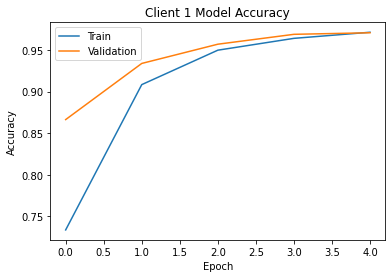

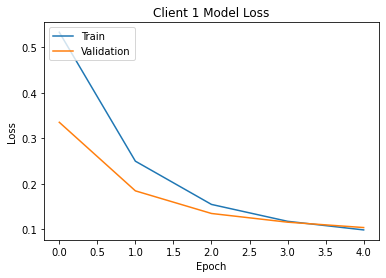

625/625 [==============================] - 1s 1ms/step


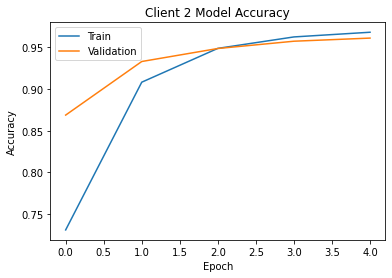

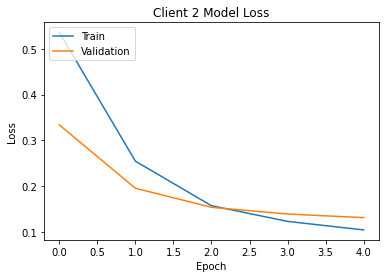

625/625 [==============================] - 1s 1ms/step


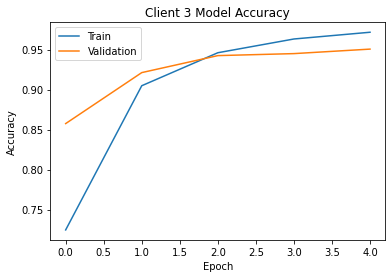

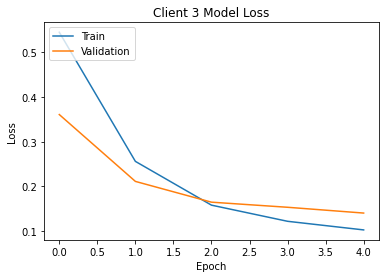

625/625 [==============================] - 1s 2ms/step


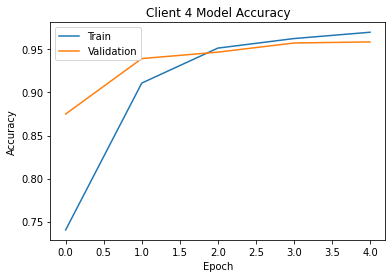

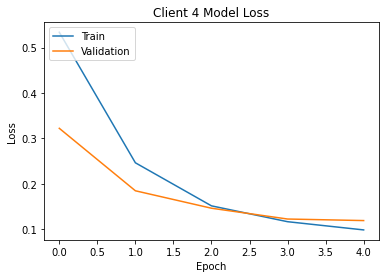

625/625 [==============================] - 1s 1ms/step


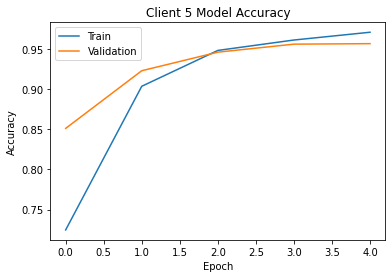

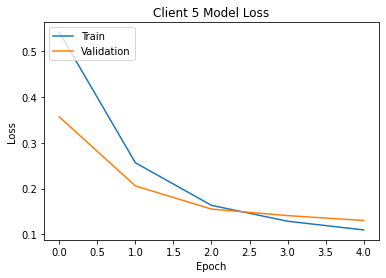

625/625 [==============================] - 1s 2ms/step


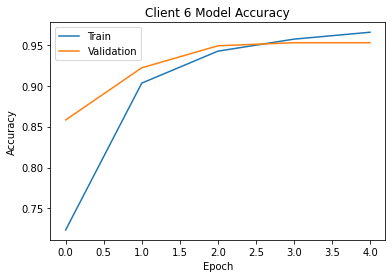

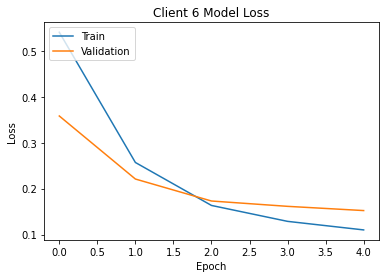

625/625 [==============================] - 1s 1ms/step


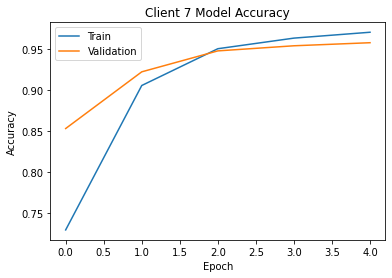

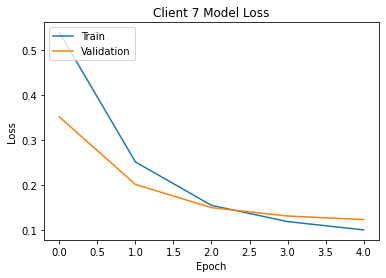

625/625 [==============================] - 1s 1ms/step


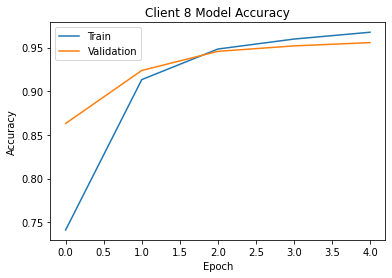

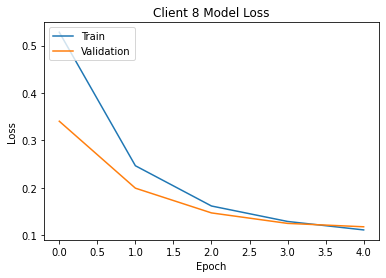

625/625 [==============================] - 1s 2ms/step


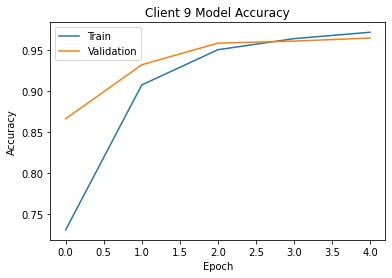

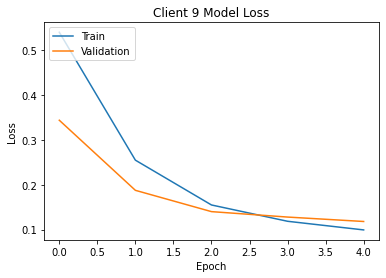

625/625 [==============================] - 1s 1ms/step


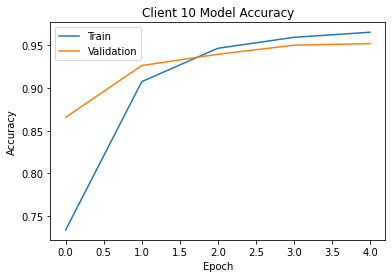

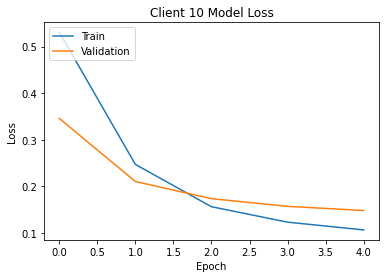

<ipython-input-10-03b80be2f923>:91: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights = np.array(client_models[0].get_weights())
<ipython-input-10-03b80be2f923>:93: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights += np.array(client_models[i].get_weights())


625/625 [==============================] - 1s 2ms/step
Global Model Accuracy:  0.9650499820709229


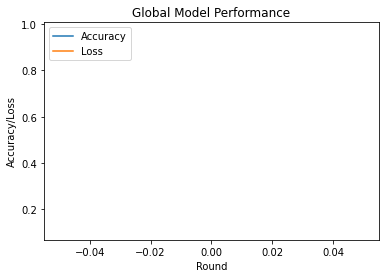

Client Model Performance Metrics:
   round  client      loss  accuracy    tn   fp   fn    tp   roc_auc
0      1       1  0.115921   0.96115  9515  454  323  9708  0.990753
1      1       2  0.111577   0.96385  9574  395  328  9703  0.991211
2      1       3  0.114242   0.96230  9533  436  318  9713  0.990886
3      1       4  0.116424   0.96150  9588  381  389  9642  0.990363
4      1       5  0.119254   0.96110  9467  502  276  9755  0.990674
5      1       6  0.118876   0.96110  9489  480  298  9733  0.990418
6      1       7  0.111161   0.96355  9629  340  389  9642  0.991115
7      1       8  0.116284   0.96370  9629  340  386  9645  0.990647
8      1       9  0.111914   0.96320  9554  415  321  9710  0.991113
9      1      10  0.119927   0.96000  9537  432  368  9663  0.990087
Global Model Performance Metrics:
   round      loss  accuracy    tn   fp   fn    tp  roc_auc
0      1  0.110317   0.96505  9569  400  299  9732  0.99145
Round:  2
625/625 [==============================] - 

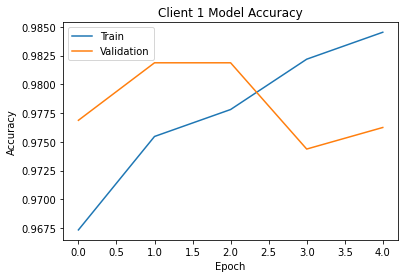

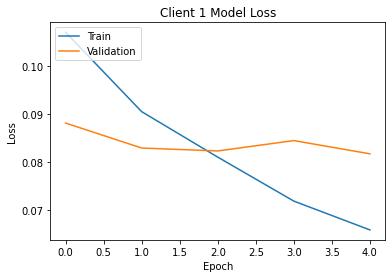

625/625 [==============================] - 1s 2ms/step


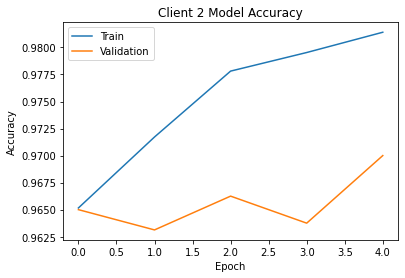

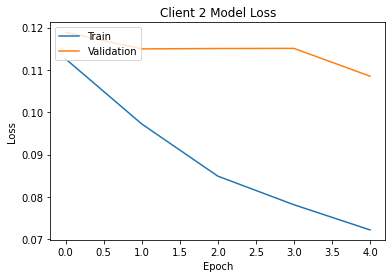

625/625 [==============================] - 1s 1ms/step


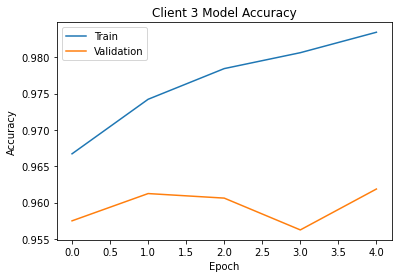

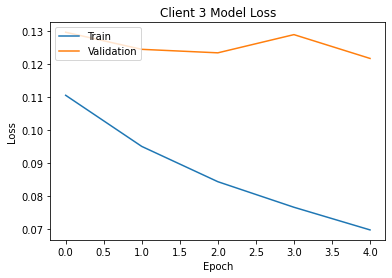

625/625 [==============================] - 3s 4ms/step


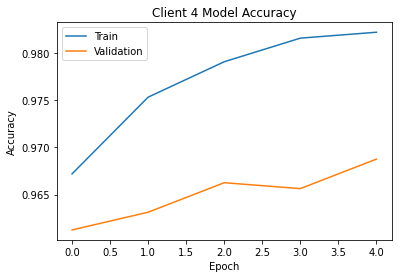

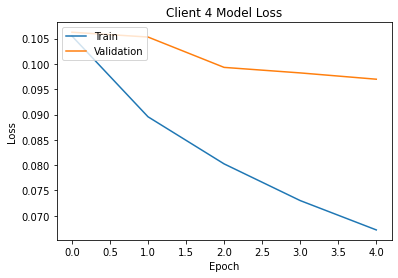

625/625 [==============================] - 1s 1ms/step


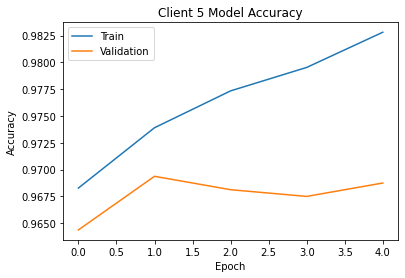

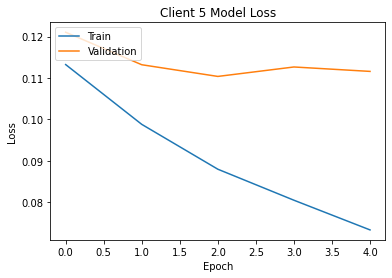

625/625 [==============================] - 1s 2ms/step


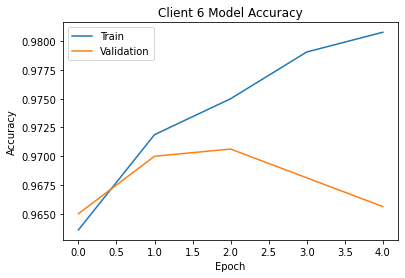

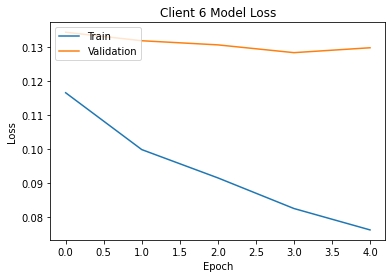

625/625 [==============================] - 4s 6ms/step


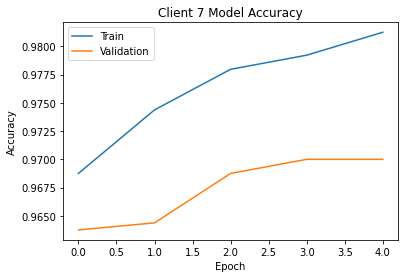

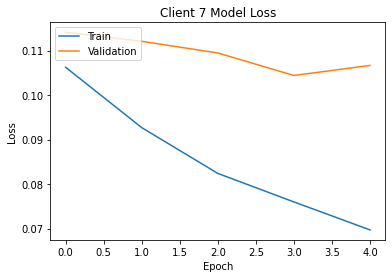

625/625 [==============================] - 3s 4ms/step


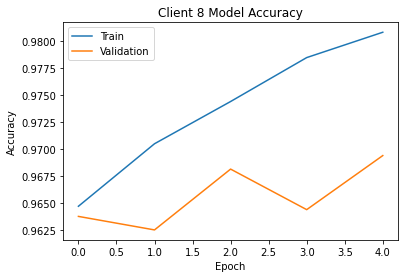

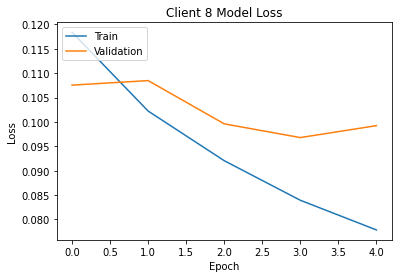

625/625 [==============================] - 1s 2ms/step


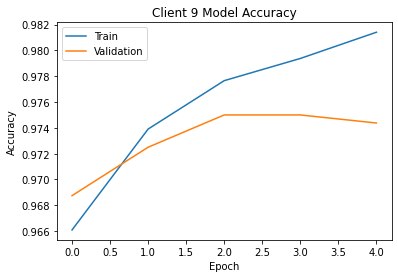

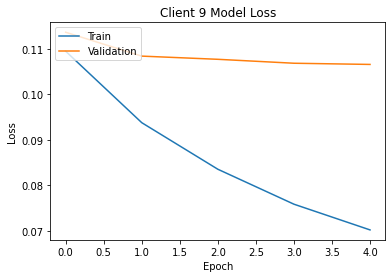

625/625 [==============================] - 1s 2ms/step


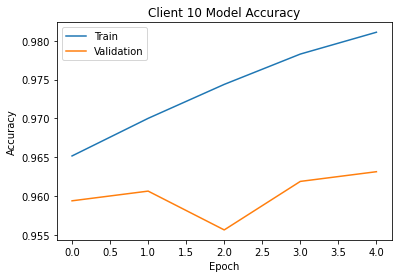

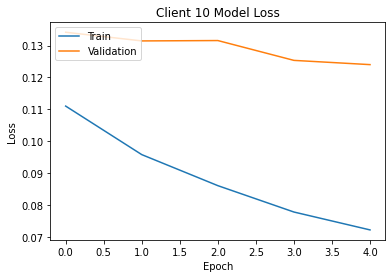

<ipython-input-10-03b80be2f923>:91: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights = np.array(client_models[0].get_weights())
<ipython-input-10-03b80be2f923>:93: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights += np.array(client_models[i].get_weights())


625/625 [==============================] - 1s 2ms/step
Global Model Accuracy:  0.9769499897956848


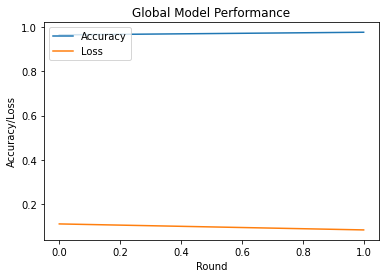

Client Model Performance Metrics:
    round  client      loss  accuracy    tn   fp   fn    tp   roc_auc
0       1       1  0.115921   0.96115  9515  454  323  9708  0.990753
1       1       2  0.111577   0.96385  9574  395  328  9703  0.991211
2       1       3  0.114242   0.96230  9533  436  318  9713  0.990886
3       1       4  0.116424   0.96150  9588  381  389  9642  0.990363
4       1       5  0.119254   0.96110  9467  502  276  9755  0.990674
5       1       6  0.118876   0.96110  9489  480  298  9733  0.990418
6       1       7  0.111161   0.96355  9629  340  389  9642  0.991115
7       1       8  0.116284   0.96370  9629  340  386  9645  0.990647
8       1       9  0.111914   0.96320  9554  415  321  9710  0.991113
9       1      10  0.119927   0.96000  9537  432  368  9663  0.990087
10      2       1  0.096313   0.97090  9687  282  300  9731  0.992699
11      2       2  0.092493   0.97285  9722  247  296  9735  0.992960
12      2       3  0.089038   0.97390  9718  251  271  9

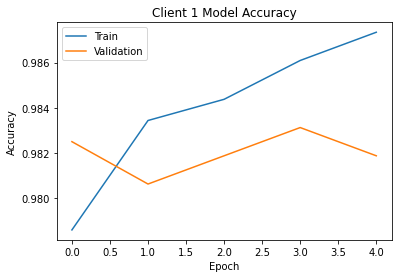

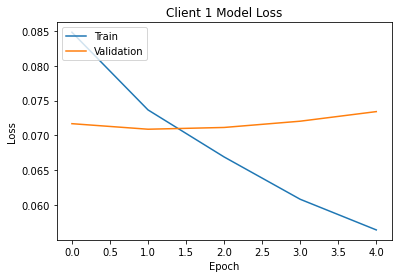

625/625 [==============================] - 1s 2ms/step


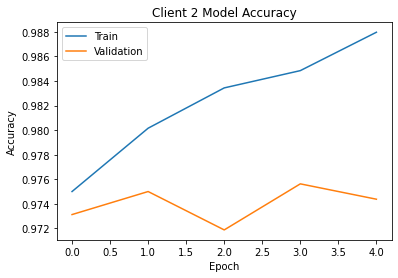

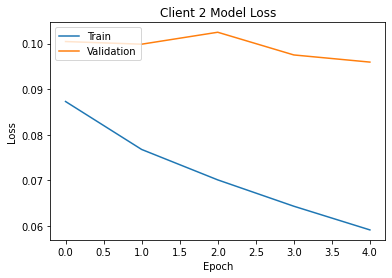

625/625 [==============================] - 2s 2ms/step


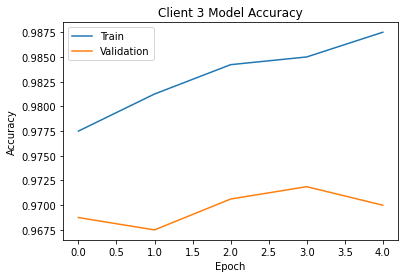

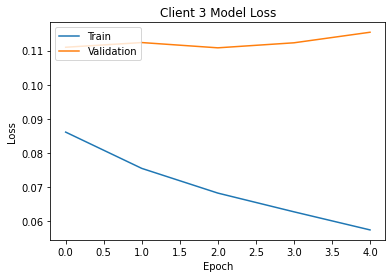

625/625 [==============================] - 1s 2ms/step


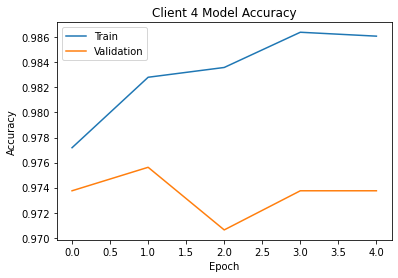

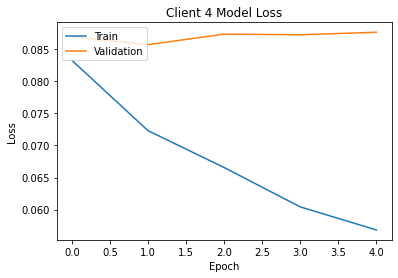

625/625 [==============================] - 1s 2ms/step


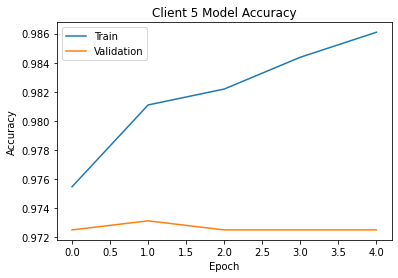

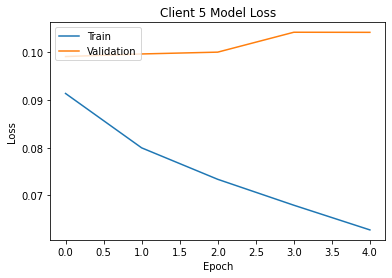

625/625 [==============================] - 1s 2ms/step


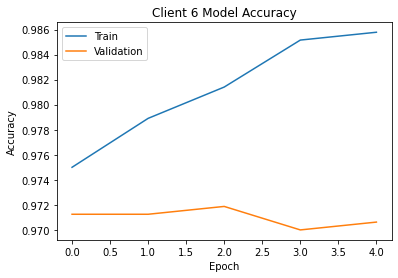

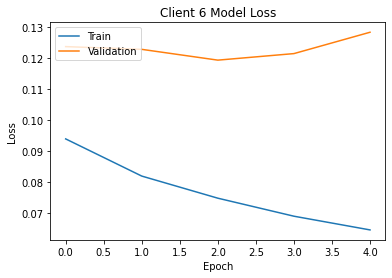

625/625 [==============================] - 2s 3ms/step


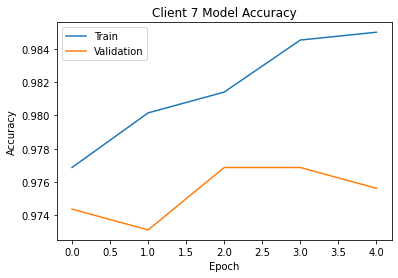

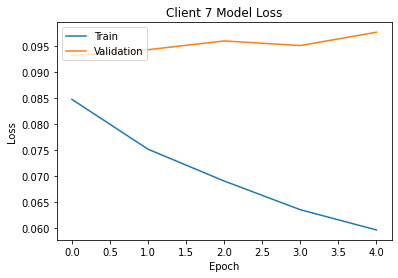

625/625 [==============================] - 2s 2ms/step


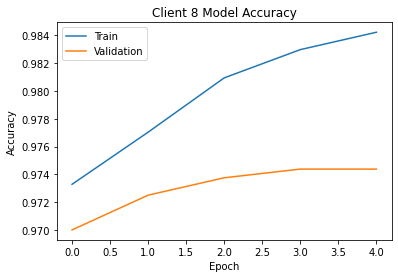

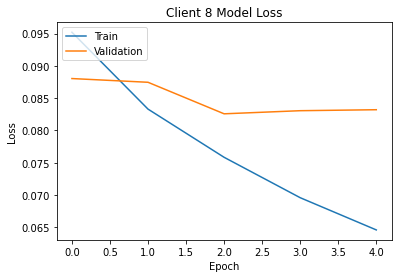

625/625 [==============================] - 2s 3ms/step


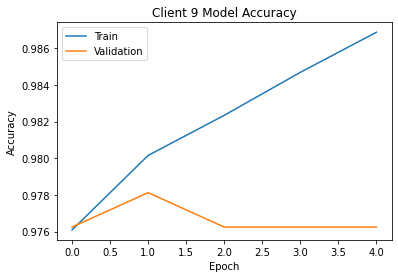

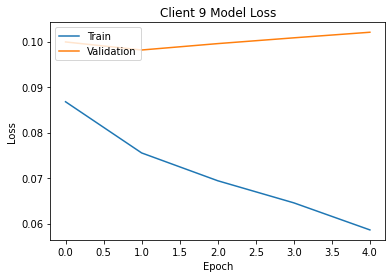

625/625 [==============================] - 3s 4ms/step


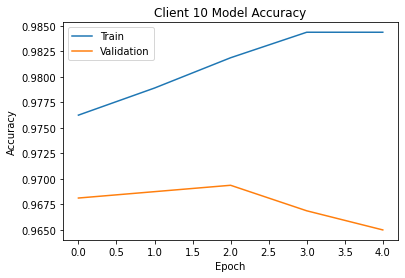

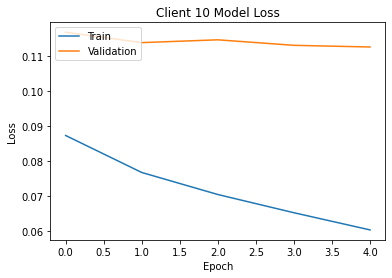

<ipython-input-10-03b80be2f923>:91: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights = np.array(client_models[0].get_weights())
<ipython-input-10-03b80be2f923>:93: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights += np.array(client_models[i].get_weights())


625/625 [==============================] - 3s 5ms/step
Global Model Accuracy:  0.9807000160217285


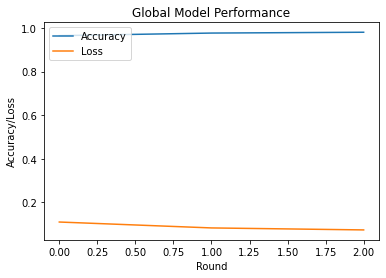

Client Model Performance Metrics:
    round  client      loss  accuracy    tn   fp   fn    tp   roc_auc
0       1       1  0.115921   0.96115  9515  454  323  9708  0.990753
1       1       2  0.111577   0.96385  9574  395  328  9703  0.991211
2       1       3  0.114242   0.96230  9533  436  318  9713  0.990886
3       1       4  0.116424   0.96150  9588  381  389  9642  0.990363
4       1       5  0.119254   0.96110  9467  502  276  9755  0.990674
5       1       6  0.118876   0.96110  9489  480  298  9733  0.990418
6       1       7  0.111161   0.96355  9629  340  389  9642  0.991115
7       1       8  0.116284   0.96370  9629  340  386  9645  0.990647
8       1       9  0.111914   0.96320  9554  415  321  9710  0.991113
9       1      10  0.119927   0.96000  9537  432  368  9663  0.990087
10      2       1  0.096313   0.97090  9687  282  300  9731  0.992699
11      2       2  0.092493   0.97285  9722  247  296  9735  0.992960
12      2       3  0.089038   0.97390  9718  251  271  9

KeyboardInterrupt: ignored

In [10]:
# Import the necessary libraries
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Generate synthetic data
X, y = make_classification(n_samples=100000, n_features=41, n_informative=14, n_redundant=0, n_classes=2, random_state=42)
data = np.hstack((X, y.reshape(-1, 1)))

# Define the labels variable
labels = data[:, -1]
data = data[:, :-1]

# Define the client and server functions
def create_client_model():
    # Create a neural network model for each client
    input_layer = Input(shape=(X_train.shape[1],))
    hidden_layer1 = Dense(32, activation='relu')(input_layer)
    hidden_layer2 = Dense(16, activation='relu')(hidden_layer1)
    output_layer = Dense(1, activation='sigmoid')(hidden_layer2)
    model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_server_model():
    # Create a global neural network model for the server
    input_layer = Input(shape=(X_train.shape[1],))
    hidden_layer1 = Dense(32, activation='relu')(input_layer)
    hidden_layer2 = Dense(16, activation='relu')(hidden_layer1)
    output_layer = Dense(1, activation='sigmoid')(hidden_layer2)
    model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Split the synthetic data into client datasets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
num_clients = 10
client_data = np.array_split(X_train, num_clients)
client_labels = np.array_split(y_train, num_clients)

# Create a server model
server_model = create_server_model()

# Train the model using federated learning
num_rounds = 10
num_epochs = 5
global_history = []
client_history = []
for round in range(num_rounds):
    print("Round: ", round+1)
    # Send the current global model to all clients
    client_models = []
    for i in range(num_clients):
        client_model = create_client_model()
        client_model.set_weights(server_model.get_weights())
        client_models.append(client_model)

    # Train each client model using their local data
    local_histories = []
    for i in range(num_clients):
        history = client_models[i].fit(client_data[i], client_labels[i], epochs=num_epochs, verbose=0, validation_split=0.2)
        local_histories.append(history)
        loss, acc = client_models[i].evaluate(X_test, y_test, verbose=0)
        y_pred = client_models[i].predict(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        y_pred = np.round(y_pred)
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        client_history.append({'round': round+1, 'client': i+1, 'loss': loss, 'accuracy':             acc, 'tn': tn, 'fp': fp, 'fn': fn, 'tp': tp, 'roc_auc': roc_auc})
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title(f'Client {i+1} Model Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.show()
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title(f'Client {i+1} Model Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.show()

    # Aggregate the model updates from all clients
    new_weights = np.array(client_models[0].get_weights())
    for i in range(1, num_clients):
        new_weights += np.array(client_models[i].get_weights())
    new_weights /= num_clients
    server_model.set_weights(new_weights)

    # Evaluate the global model
    loss, acc = server_model.evaluate(X_test, y_test, verbose=0)
    y_pred = server_model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    y_pred = np.round(y_pred)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    global_history.append({'round': round+1, 'loss': loss, 'accuracy': acc, 'tn': tn, 'fp': fp, 'fn': fn, 'tp': tp, 'roc_auc': roc_auc})
    print("Global Model Accuracy: ", acc)

    # Plot the performance of the global model
    plt.plot([x['accuracy'] for x in global_history])
    plt.plot([x['loss'] for x in global_history])
    plt.title('Global Model Performance')
    plt.ylabel('Accuracy/Loss')
    plt.xlabel('Round')
    plt.legend(['Accuracy', 'Loss'], loc='upper left')
    plt.show()

    # Create a table of performance metrics for each client model and the final global model
    import pandas as pd

    client_history_df = pd.DataFrame(client_history)
    global_history_df = pd.DataFrame(global_history)
    print("Client Model Performance Metrics:")
    print(client_history_df)
    print("Global Model Performance Metrics:")
    print(global_history_df)



Round:  1


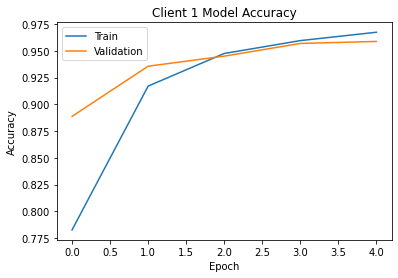

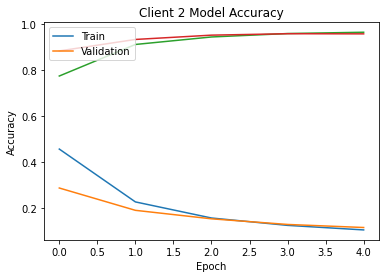

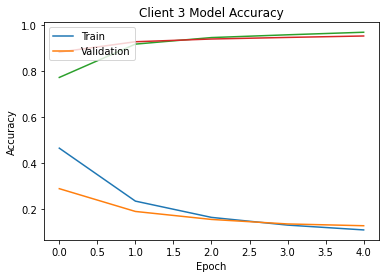

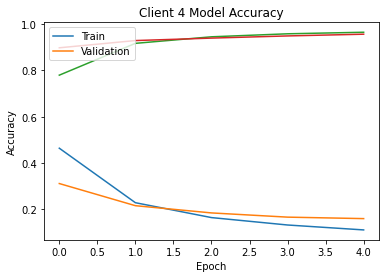

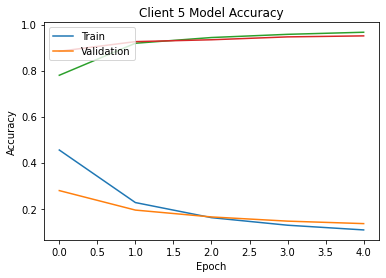

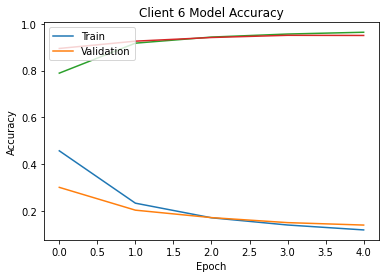

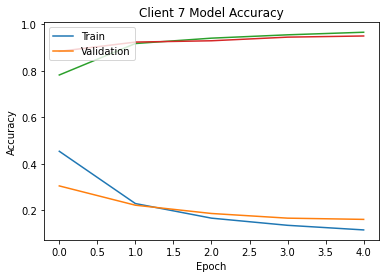

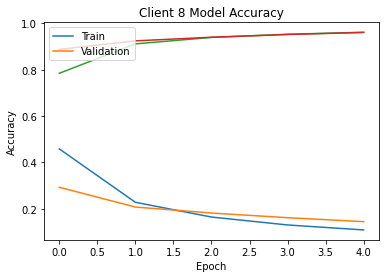

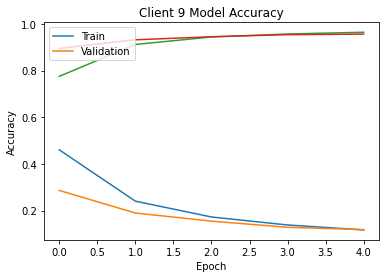

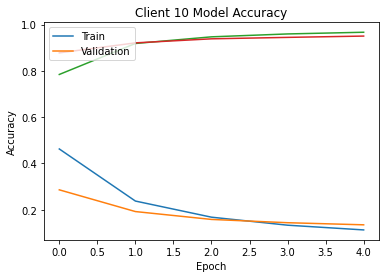

Round:  2


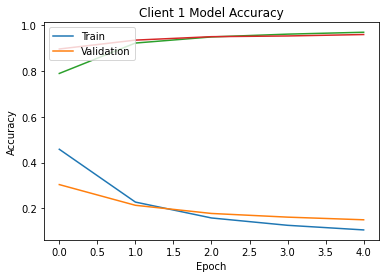

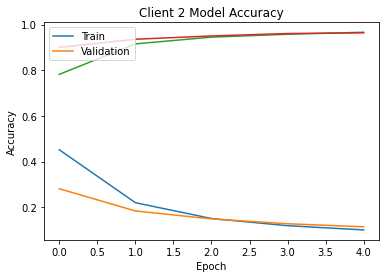

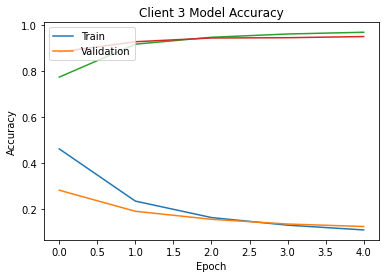

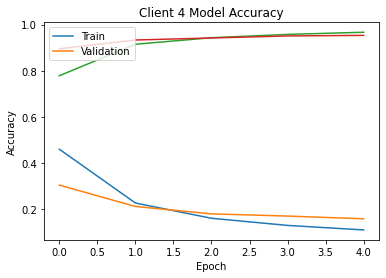

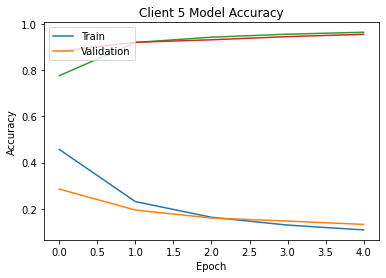

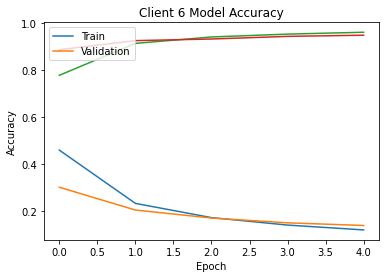

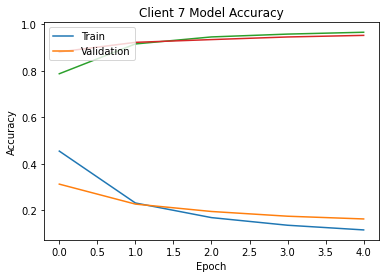

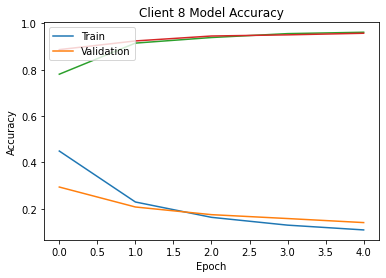

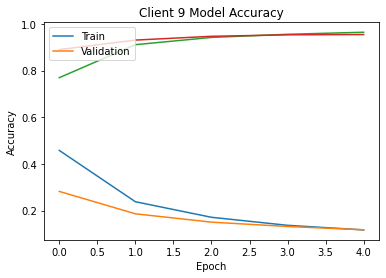

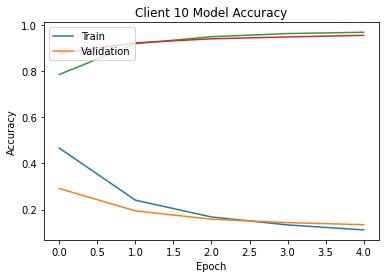

Round:  3


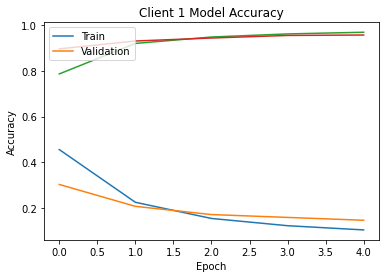

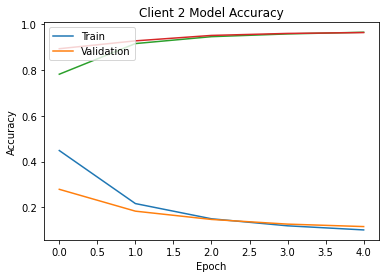

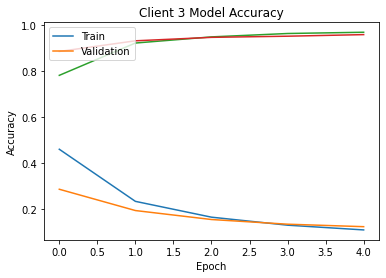

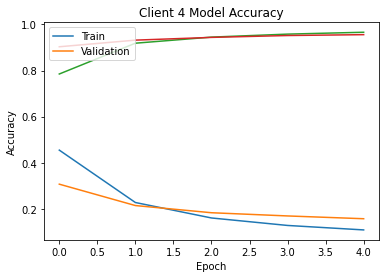

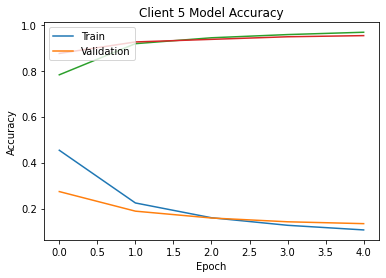

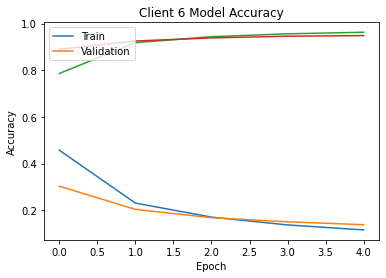

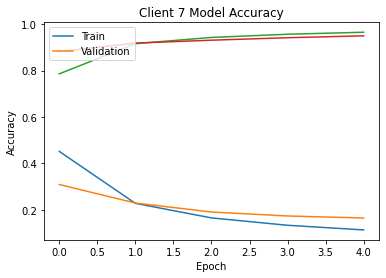

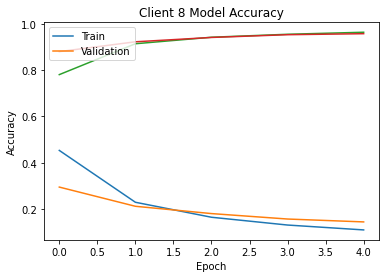

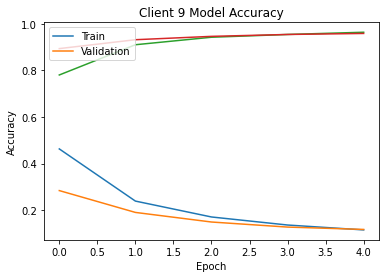

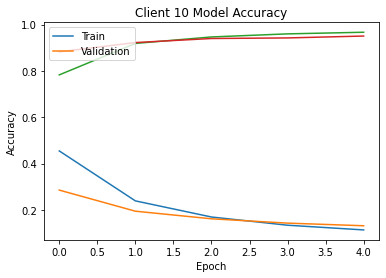

Round:  4


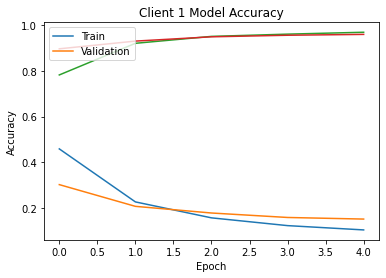

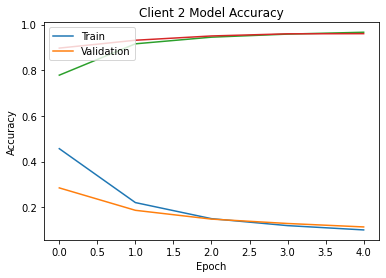

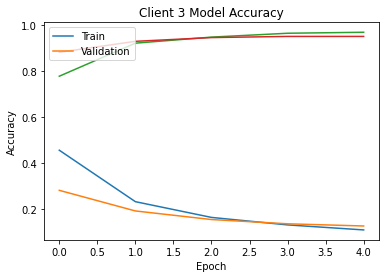

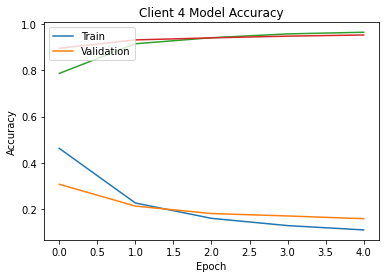

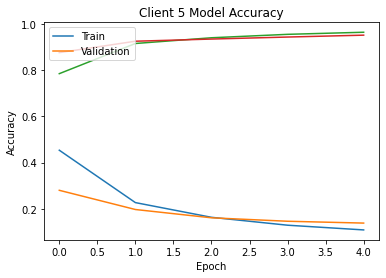

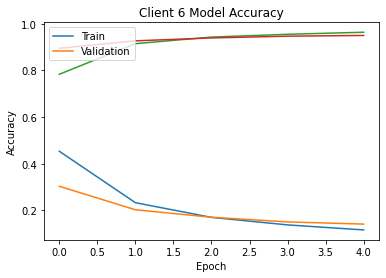

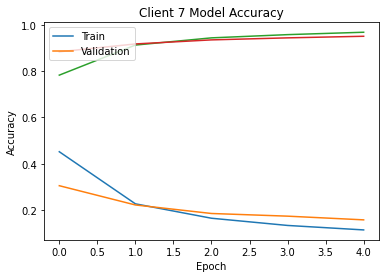

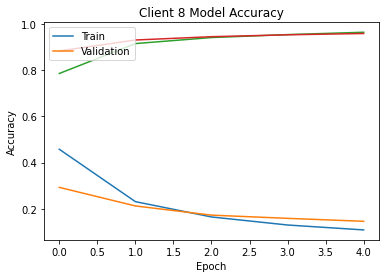

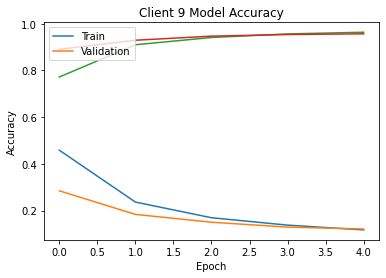

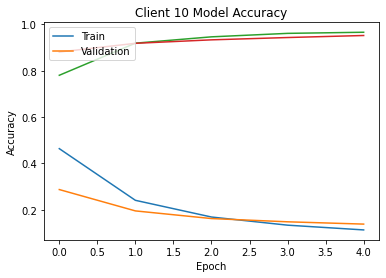

Round:  5


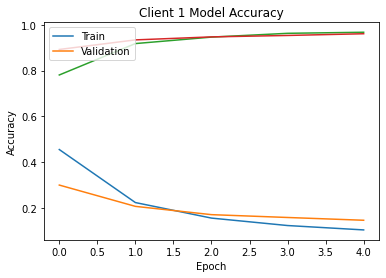

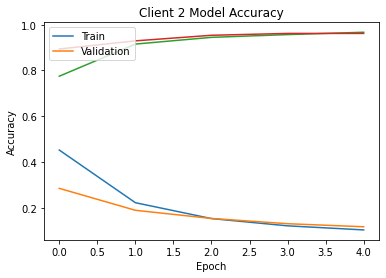

KeyboardInterrupt: ignored

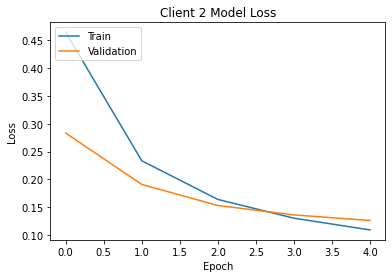

In [13]:
# Import the necessary libraries
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Generate synthetic data
X, y = make_classification(n_samples=100000, n_features=41, n_informative=14, n_redundant=0, n_classes=2, random_state=42)
data = np.hstack((X, y.reshape(-1, 1)))

# Define the labels variable
labels = data[:, -1]
data = data[:, :-1]

# Define the client and server functions
def create_client_model():
    # Create a neural network model for each client
    input_layer = Input(shape=(X_train.shape[1],))
    hidden_layer1 = Dense(32, activation='relu')(input_layer)
    hidden_layer2 = Dense(16, activation='relu')(hidden_layer1)
    output_layer = Dense(1, activation='sigmoid')(hidden_layer2)
    model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_server_model():
    # Create a global neural network model for the server
    input_layer = Input(shape=(X_train.shape[1],))
    hidden_layer1 = Dense(32, activation='relu')(input_layer)
    hidden_layer2 = Dense(16, activation='relu')(hidden_layer1)
    output_layer = Dense(1, activation='sigmoid')(hidden_layer2)
    model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Split the synthetic data into client datasets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
num_clients = 10
client_data = np.array_split(X_train, num_clients)
client_labels = np.array_split(y_train, num_clients)

# Create a server model
server_model = create_server_model()

# Train the model using federated learning
num_rounds = 10
num_epochs = 5
global_history = []
client_history = []
for round in range(num_rounds):
    print("Round: ", round+1)
    # Send the current global model to all clients
    client_models = []
    for i in range(num_clients):
        client_model = create_client_model()
        client_model.set_weights(server_model.get_weights())
        client_models.append(client_model)

    # Train each client model using their local data
    for i in range(num_clients):
        history = client_models[i].fit(client_data[i], client_labels[i], epochs=num_epochs, verbose=0, validation_split=0.2)
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title(f'Client {i+1} Model Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.show()
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title(f'Client {i+1} Model Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.show


Round:  1
625/625 [==============================] - 1s 1ms/step


<ipython-input-15-94fc19e7f9dd>:78: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights = np.array(client_models[0].get_weights())
<ipython-input-15-94fc19e7f9dd>:80: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights += np.array(client_models[i].get_weights())


625/625 [==============================] - 1s 1ms/step
Global Model Accuracy:  0.5335999727249146
Round:  2
625/625 [==============================] - 1s 1ms/step


<ipython-input-15-94fc19e7f9dd>:78: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights = np.array(client_models[0].get_weights())
<ipython-input-15-94fc19e7f9dd>:80: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights += np.array(client_models[i].get_weights())


625/625 [==============================] - 1s 1ms/step
Global Model Accuracy:  0.5412999987602234
Round:  3
625/625 [==============================] - 1s 1ms/step


<ipython-input-15-94fc19e7f9dd>:78: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights = np.array(client_models[0].get_weights())
<ipython-input-15-94fc19e7f9dd>:80: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights += np.array(client_models[i].get_weights())


625/625 [==============================] - 1s 1ms/step
Global Model Accuracy:  0.5493500232696533
Round:  4
625/625 [==============================] - 1s 1ms/step


<ipython-input-15-94fc19e7f9dd>:78: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights = np.array(client_models[0].get_weights())
<ipython-input-15-94fc19e7f9dd>:80: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights += np.array(client_models[i].get_weights())


625/625 [==============================] - 1s 1ms/step
Global Model Accuracy:  0.5562499761581421
Round:  5
625/625 [==============================] - 1s 1ms/step


<ipython-input-15-94fc19e7f9dd>:78: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights = np.array(client_models[0].get_weights())
<ipython-input-15-94fc19e7f9dd>:80: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights += np.array(client_models[i].get_weights())


625/625 [==============================] - 1s 1ms/step
Global Model Accuracy:  0.5647000074386597
Round:  6
625/625 [==============================] - 1s 1ms/step


<ipython-input-15-94fc19e7f9dd>:78: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights = np.array(client_models[0].get_weights())
<ipython-input-15-94fc19e7f9dd>:80: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights += np.array(client_models[i].get_weights())


625/625 [==============================] - 1s 2ms/step
Global Model Accuracy:  0.5714499950408936
Round:  7
625/625 [==============================] - 1s 1ms/step


<ipython-input-15-94fc19e7f9dd>:78: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights = np.array(client_models[0].get_weights())
<ipython-input-15-94fc19e7f9dd>:80: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights += np.array(client_models[i].get_weights())


625/625 [==============================] - 1s 2ms/step
Global Model Accuracy:  0.5799999833106995
Round:  8
625/625 [==============================] - 1s 2ms/step


<ipython-input-15-94fc19e7f9dd>:78: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights = np.array(client_models[0].get_weights())
<ipython-input-15-94fc19e7f9dd>:80: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights += np.array(client_models[i].get_weights())


625/625 [==============================] - 1s 1ms/step
Global Model Accuracy:  0.5873000025749207
Round:  9
625/625 [==============================] - 1s 2ms/step


<ipython-input-15-94fc19e7f9dd>:78: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights = np.array(client_models[0].get_weights())
<ipython-input-15-94fc19e7f9dd>:80: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights += np.array(client_models[i].get_weights())


625/625 [==============================] - 2s 2ms/step
Global Model Accuracy:  0.5950000286102295
Round:  10
625/625 [==============================] - 1s 2ms/step


<ipython-input-15-94fc19e7f9dd>:78: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights = np.array(client_models[0].get_weights())
<ipython-input-15-94fc19e7f9dd>:80: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_weights += np.array(client_models[i].get_weights())


625/625 [==============================] - 1s 2ms/step
Global Model Accuracy:  0.6013500094413757


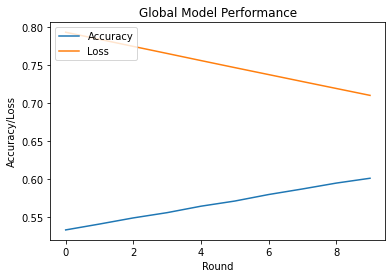

Client Model Performance Metrics:
    round  client      loss  accuracy    tn   fp   fn    tp   roc_auc
0       1       1  0.122089   0.96085  9592  377  406  9625  0.989686
1       1       2  0.122982   0.96005  9459  510  289  9742  0.990053
2       1       3  0.122524   0.95870  9546  423  403  9628  0.989627
3       1       4  0.127047   0.95680  9444  525  339  9692  0.989148
4       1       5  0.124565   0.95765  9584  385  462  9569  0.989554
..    ...     ...       ...       ...   ...  ...  ...   ...       ...
95     10       6  0.124588   0.95975  9630  339  466  9565  0.989351
96     10       7  0.116284   0.96215  9565  404  353  9678  0.990478
97     10       8  0.126614   0.95800  9552  417  423  9608  0.988916
98     10       9  0.117692   0.96280  9568  401  343  9688  0.990094
99     10      10  0.119896   0.96090  9509  460  322  9709  0.990043

[100 rows x 9 columns]
Global Model Performance Metrics:
   round      loss  accuracy    tn    fp    fn    tp   roc_auc
0    

In [15]:
# Import the necessary libraries
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Generate synthetic data
X, y = make_classification(n_samples=100000, n_features=41, n_informative=14, n_redundant=0, n_classes=2, random_state=42)
data = np.hstack((X, y.reshape(-1, 1)))

# Define the labels variable
labels = data[:, -1]
data = data[:, :-1]

# Define the client and server functions
def create_client_model():
    # Create a neural network model for each client
    input_layer = Input(shape=(X_train.shape[1],))
    hidden_layer1 = Dense(32, activation='relu')(input_layer)
    hidden_layer2 = Dense(16, activation='relu')(hidden_layer1)
    output_layer = Dense(1, activation='sigmoid')(hidden_layer2)
    model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_server_model():
    # Create a global neural network model for the server
    input_layer = Input(shape=(X_train.shape[1],))
    hidden_layer1 = Dense(32, activation='relu')(input_layer)
    hidden_layer2 = Dense(16, activation='relu')(hidden_layer1)
    output_layer = Dense(1, activation='sigmoid')(hidden_layer2)
    model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Split the synthetic data into client datasets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
num_clients = 10
client_data = np.array_split(X_train, num_clients)
client_labels = np.array_split(y_train, num_clients)

# Create a server model
server_model = create_server_model()

# Train the model using federated learning with FedProx
num_rounds = 10
num_epochs = 5
global_history = []
client_history = []
mu = 0.01  # Proximal term weight
for round in range(num_rounds):
    print("Round: ", round+1)
    # Send the current global model to all clients
    client_models = []
    for i in range(num_clients):
        client_model = create_client_model()
        client_model.set_weights(server_model.get_weights())
        client_models.append(client_model)

    # Train each client model using their local data
    local_histories = []
    for i in range(num_clients):
        history = client_models[i].fit(client_data[i], client_labels[i], epochs=num_epochs, verbose=0, validation_split=0.2)
        local_histories.append(history)
        loss, acc = client_models[i].evaluate(X_test, y_test, verbose=0)
        y_pred = client_models[i].predict(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        y_pred = np.round(y_pred)
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        client_history.append({'round': round+1, 'client': i+1, 'loss': loss, 'accuracy': acc, 'tn': tn, 'fp': fp, 'fn': fn, 'tp': tp, 'roc_auc': roc_auc})

    # Aggregate the model updates from all clients with FedProx
    new_weights = np.array(client_models[0].get_weights())
    for i in range(1, num_clients):
        new_weights += np.array(client_models[i].get_weights())
    new_weights /= num_clients
    global_weights = [(1 - mu) * w1 + mu * w2 for w1, w2 in zip(server_model.get_weights(), new_weights)]
    server_model.set_weights(global_weights)

    # Evaluate the global model
    loss, acc = server_model.evaluate(X_test, y_test, verbose=0)
    y_pred = server_model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    y_pred = np.round(y_pred)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    global_history.append({'round': round+1, 'loss': loss, 'accuracy': acc, 'tn': tn, 'fp': fp, 'fn': fn, 'tp': tp, 'roc_auc': roc_auc})
    print("Global Model Accuracy: ", acc)

# Plot the performance of the global model
plt.plot([x['accuracy'] for x in global_history])
plt.plot([x['loss'] for x in global_history])
plt.title('Global Model Performance')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Round')
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.show()

# Create a table of performance metrics for each client model and the final global model
import pandas as pd

client_history_df = pd.DataFrame(client_history)
global_history_df = pd.DataFrame(global_history)
print("Client Model Performance Metrics:")
print(client_history_df)
print("Global Model Performance Metrics:")
print(global_history_df)



In [16]:
# Import the necessary libraries
import numpy as np
import tensorflow as tf
import tensorflow_federated as tff
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Generate synthetic data
X, y = make_classification(n_samples=100000, n_features=41, n_informative=14, n_redundant=0, n_classes=2, random_state=42)
data = np.hstack((X, y.reshape(-1, 1)))

# Define the labels variable
labels = data[:, -1]
data = data[:, :-1]

# Define the client and server functions
def create_client_model():
    # Create a neural network model for each client
    input_layer = Input(shape=(X_train.shape[1],))
    hidden_layer1 = Dense(32, activation='relu')(input_layer)
    hidden_layer2 = Dense(16, activation='relu')(hidden_layer1)
    output_layer = Dense(1, activation='sigmoid')(hidden_layer2)
    model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_server_model():
    # Create a global neural network model for the server
    input_layer = Input(shape=(X_train.shape[1],))
    hidden_layer1 = Dense(32, activation='relu')(input_layer)
    hidden_layer2 = Dense(16, activation='relu')(hidden_layer1)
    output_layer = Dense(1, activation='sigmoid')(hidden_layer2)
    model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Split the synthetic data into client datasets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
num_clients = 10
client_data = np.array_split(X_train, num_clients)
client_labels = np.array_split(y_train, num_clients)

# Define the Federated Averaging algorithm
federated_averaging = tff.learning.build_federated_averaging_process(
    create_server_model=create_server_model,
    create_client_model=create_client_model
)

# Define the client dataset type
tff_dataset_type = tff.types.StructType([
    ('x', tf.float32, (None, X_train.shape[1])),
    ('y', tf.int32, (None,))
])

# Create a TFF dataset for each client
client_datasets = [
    tff.simulation.ClientData.from_tensor_slices({
        'x': client_data[i],
        'y': client_labels[i]
    }).create_tf_dataset_for_client(client_labels[i])
    for i in range(num_clients)
]

# Train the model using federated learning with FedProx
num_rounds = 10
num_epochs = 5
global_history = []
client_history = []
mu = 0.01  # Proximal term weight
for round in range(num_rounds):
    print("Round: ", round+1)
    # Train each client model using Federated Averaging
    client_models, client_histories = federated_averaging(client_datasets, client_models=None, num_epochs=num_epochs)

    # Evaluate
for i in range(num_clients):
    client_history.append({
        'round': round+1,
        'client': i+1,
        'loss': client_histories[i].history['loss'][-1],
        'accuracy': client_histories[i].history['accuracy'][-1]
    })
    plt.plot(client_histories[i].history['accuracy'])
    plt.plot(client_histories[i].history['val_accuracy'])
    plt.title(f'Client {i+1} Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    plt.plot(client_histories[i].history['loss'])
    plt.plot(client_histories[i].history['val_loss'])
    plt.title(f'Client {i+1} Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Evaluate the global model with FedProx
server_state, _ = federated_averaging.get_model_weights()
global_weights = [(1 - mu) * w1 + mu * w2 for w1, w2 in zip(server_model.get_weights(), server_state)]
tff.learning.assign_weights_to_keras_model(server_model, global_weights)
loss, acc = server_model.evaluate(X_test, y_test, verbose=0)
y_pred = server_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
y_pred = np.round(y_pred)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
global_history.append({
    'round': round+1,
    'loss': loss,
    'accuracy': acc,
    'tn': tn,
    'fp': fp,
    'fn': fn,
    'tp': tp,
    'roc_auc': roc_auc
})
print("Global Model Accuracy: ", acc)

# Plot the performance of the global model
plt.plot([x['accuracy'] for x in global_history])
plt.plot([x['loss'] for x in global_history])
plt.title('Global Model Performance')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Round')
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.show()

# Create a table of performance metrics for each client model and the final global model
import pandas as pd

client_history_df = pd.DataFrame(client_history)
global_history_df = pd.DataFrame(global_history)
print("Client Model Performance Metrics:")
print(client_history_df)
print("Global Model Performance Metrics:")
print(global_history_df)

TypeError: ignored